# Nigerian Music scraped from Spotify - an analysis

In [54]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("../data/nigerian-songs.csv")

df.describe()
df.head()
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 530 entries, 0 to 529
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              530 non-null    object 
 1   album             530 non-null    object 
 2   artist            530 non-null    object 
 3   artist_top_genre  530 non-null    object 
 4   release_date      530 non-null    int64  
 5   length            530 non-null    int64  
 6   popularity        530 non-null    int64  
 7   danceability      530 non-null    float64
 8   acousticness      530 non-null    float64
 9   energy            530 non-null    float64
 10  instrumentalness  530 non-null    float64
 11  liveness          530 non-null    float64
 12  loudness          530 non-null    float64
 13  speechiness       530 non-null    float64
 14  tempo             530 non-null    float64
 15  time_signature    530 non-null    int64  
dtypes: float64(8), int64(4), object(4)
memory us

Text(0.5, 1.0, 'Top genres')

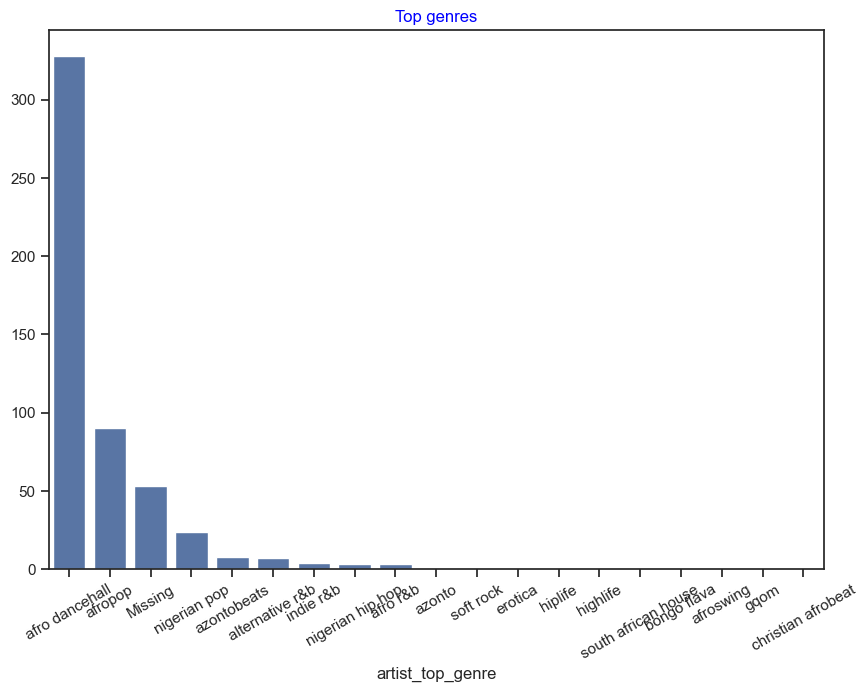

In [55]:
import seaborn as sns

top = df["artist_top_genre"].value_counts()
plt.figure(figsize=(10,7))
sns.barplot(x=top[:].index,y=top[:].values)
plt.xticks(rotation=30)

plt.title('Top genres',color = 'blue')


Text(0.5, 1.0, 'Top genres')

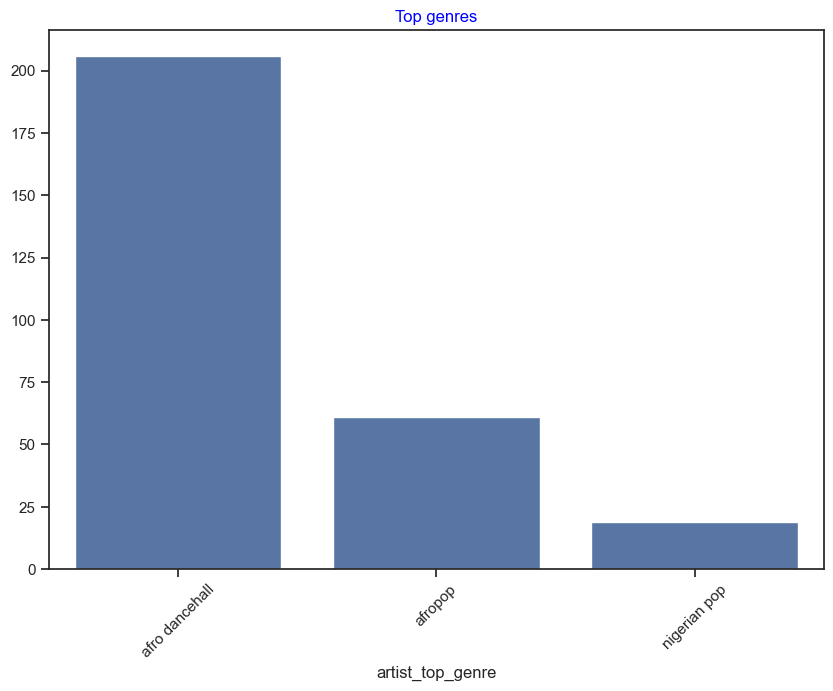

In [56]:
# df = df[(df['artist_top_genre'] == 'afro dancehall') | (df['artist_top_genre'] == 'afropop') | (df['artist_top_genre'] == 'nigerian pop')]
# df = df[(df["popularity"] > 0)]
# top = df["artist_top_genre"].value_counts()
# print(top)
df = df[(df['artist_top_genre'] == 'afro dancehall') | (df['artist_top_genre'] == 'afropop') | (df['artist_top_genre'] == 'nigerian pop')]
df = df[(df['popularity'] > 0)]
top = df['artist_top_genre'].value_counts()
plt.figure(figsize=(10,7))
sns.barplot(x=top.index,y=top.values)
plt.xticks(rotation=45)
plt.title('Top genres',color = 'blue')

<Axes: >

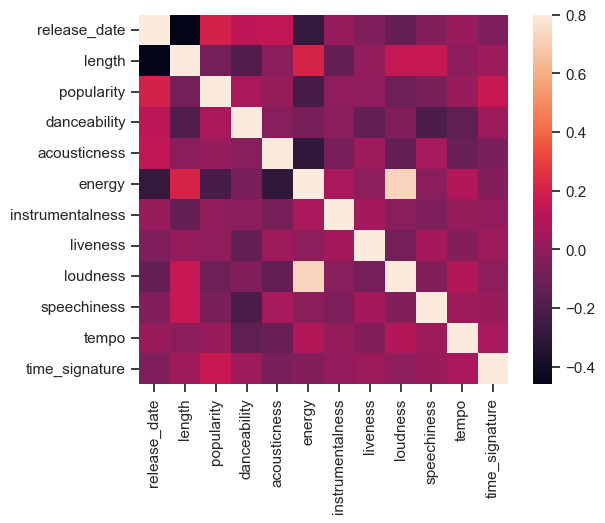

In [57]:
corrmat = df.corr(numeric_only=True)
sns.heatmap(corrmat, vmax=.8, square=True)

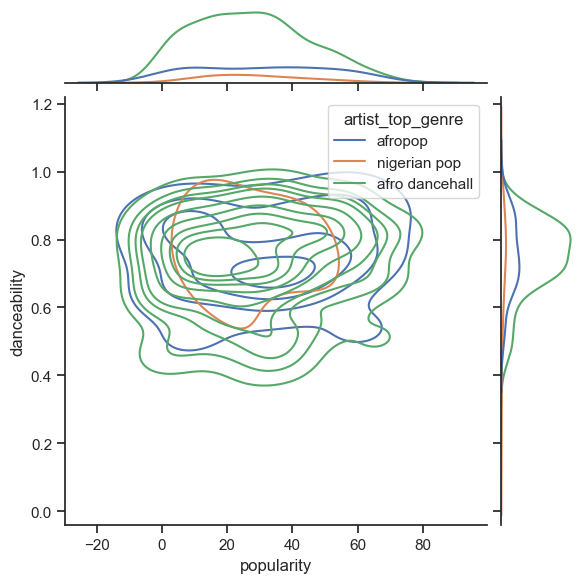

In [58]:
sns.set_theme(style='ticks')

g = sns.jointplot(
    data = df,
    x="popularity", y="danceability", hue="artist_top_genre",
    kind="kde"
)

artist_top_genre
afro dancehall    206
afropop            61
nigerian pop       19
Name: count, dtype: int64


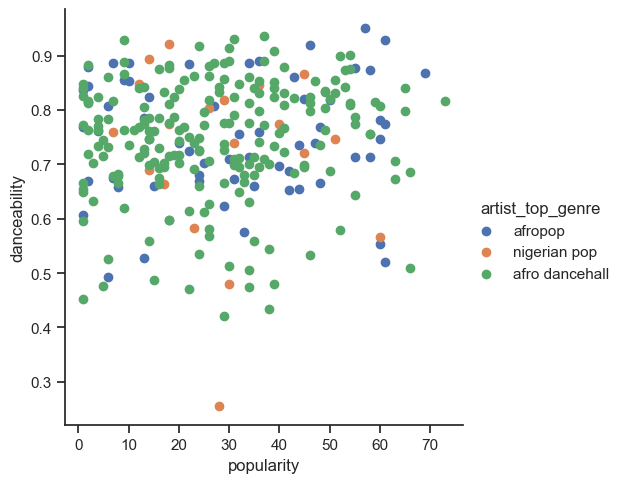

In [59]:
sns.FacetGrid(df, hue="artist_top_genre", height=5) \
       .map(plt.scatter, "popularity", "danceability") \
       .add_legend()
print(df["artist_top_genre"].value_counts())